# New Topic Tool AB Test Report: Logged-out User Analysis

**Megan Neisler, Senior Data Scientist, Wikimedia Foundation**

** 13 April 2022**

[TASK](https://phabricator.wikimedia.org/T277825) | [CODEBASE](https://github.com/wikimedia-research/New-discussion-tool-analysis-2020)

# Table of Contents

1. [Introduction](#Introduction)
2. [Methodology](#Methodology)
3. [New Topic Tool Completion Rate](#New-Topic-Tool-Completion-Rate)
4. [Guardrail Analyses](#Guardrail-Analyses)
5. [Curiosities](#Curiosities)

# Introduction

The Wikimedia Foundation's [Editing team](https://www.mediawiki.org/wiki/Editing_team#:~:text=The%20Editing%20team%20is%20the,tools%20like%20TemplateData%20and%20Citoid.) is working to improve how contributors communicate on Wikipedia using talk pages through a series of incremental improvements that will be released over time.

As part of this effort, the Editing team introduced a new workflow for starting new topic threads on talk pages, across Wikipedia's 16 talk namespaces. This new workflow is intended to make it more intuitive for Junior Contributors to initiate conversations in ways other contributors can easily reply to and to help Senior Contributors do the same, with less effort. 


The new topic tool tool provides an an inline form for adding new topics. In addition, the language throughout the workflow was adjusted to be more topic-specific.

The team ran an AB test of the New Topic Tool from 27 January 2022 through 25 March 2022 [^timeline] to assess the efficacy of this new feature. The test included all logged-in and logged-out users that edited a talk page at one the 20 participating Wikipedias during the duration of the AB test (see full list of [participating Wikipedias in task description](https://phabricator.wikimedia.org/T277825) and conditions outlined in the methodlology section below). During this test, 50% of users included in the test had the New Topic tool automatically enabled, and 50% did not. This report focues on the results for logged-out users. 

[^timeline]: Note that we excluded logged-out data collected from from 27 January 2022 to 17 February 2022 in this analysis due to errors in the bucketing implementation that did not accurately log all the events in the control group.

You can find more information about features of this tool and project updates on the [project page](https://www.mediawiki.org/wiki/Talk_pages_project/New_discussion).

# Methodology

Similar to the analysis on logged-in users, the AB test on logged-out users was run on a per Wikipedia basis and contributors included in the test were randomly assigned to either the control (new topic tool disabled by default) or treatment (new topic tool enabled by default). There are a few notable differences between the methodlogy used for the logged-in user analysis, which are summarized below:

* Logged-out users were not able to previously access to the New Topic Tool as a beta preference and were not able to turn the tool on or off the tool in Special:Preferences; however, it's possible the user previously had access to the tool if they previously viewed a talk page as a logged-in user. 
* Unlike the logged-in users who have a persistent bucket that's applied to their account, the logged out bucketing applies entirely to the current browser that is being used by the logged-out user.
* We do not have data on the experience level of an anon user and, as a result, we are not able to account for the impact of experience level on these contributors.
* All bucketed logged-out users were assigned an anonymous user token for the purpose of this analysis.The `anonymous_user_token` is a temporarily-assigned unique ID (cookie that expires within 90 days) that is logged in the EditAttemptStep schema.
* WikiEditor's server-side logging doesn't have access to the bucket or anonymous user ID for logged-out users. As a result, we had to review the `event.action = 'ready'` event in EditAttemptStep to determine the user's assigned bucket. 
* When analyzing data from the A/B test, we want to remember that fa.wiki and pt.wiki have stopped allowing IPs from editing. More context in: T291306#7553319.
* Per the way our current infrastructure is set up, it is possible for the following to happen:
   * 1. A logged in user ("Person 1") is assigned a test bucket (e.g. test or control)
   * 2. "Person 1" logs out
   * 3. "Person 1" revisits the Wikipedia where the A/B test is being run
   * 4. "Person 1" becomes bucketed in the A/B test for a second time which means the A/B test "thinks" that in "Step 3." someone new has entered the test when in reality it is the same person being bucketed twice


Upon conclusion of the test on 25 March 2022, we recorded a total of 9,527 new topic attempts initiated across both test groups by 7,823 distinct logged-out contributors across all experience levels. Data was collected in [EditAttemptStep](https://gerrit.wikimedia.org/r/plugins/gitiles/schemas/event/secondary/+/refs/heads/master/jsonschema/analytics/legacy/editattemptstep/) and [talk_page_edit](https://schema.wikimedia.org/repositories//secondary/jsonschema/analytics/mediawiki/talk_page_edit/current.yaml) .

In this test, a user can add a new topic using the New Topic Tool or using new topic workflows available with wikitext full-page and section editing. For the purpose of this analysis, these two types of editing experiences are defined as follows: 

**New Topic Tool:** Any edit to add a new topic (section) to a talk page namespace made with the new topic tool. The new topic tool allows edits using both wikitext and source mode. New Topic tool events were sampled at 100%. 

Recorded in EditAttemptStep as: `event.action = 'init'`, `event.integration = 'discussiontools'`, `event.init_type = 'section'`


**Previous Add New Section Link:** Any edit to add a new topic (section) using the existing `section=new` link and workflow. These events were sampled at a rate of 1/16, or 6.25%.  

Recorded in the EditAttemptStep as: `event.action = 'init', event.integration = 'page' , event.init_type = 'section', event.init_mechanism IN ('url-new', 'new')` 

We excluded the following types of edits from this analysis: (1) edits made with the reply tool, (2) full-page edits to create a new page or to an existing page, (3) corrective edits to an existing section. Note: It's possible to create a new section using full page editing but these were excluded for the following reasons (1) we do not have instrumentation to decipher beween an attempt to make an edit to existing text on the page vs an edit to create a new section using full page editing; and (2) This method exists in both the test and control groups and we do not believe would be impacted by the appearance of the new topic tool.  

See the following Phabricator tickets for further details regarding instrumentation and implementation of the AB test:

* Implement AB test bucketing [T291307](https://phabricator.wikimedia.org/T291307)
* Start AB test [T291308](https://phabricator.wikimedia.org/T291308)

In [1]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [5]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
    library(tidyverse)
   # Modeling 
    library(brms)
    library(lme4)
    library(tidybayes)
    set.seed(5)
    # Tables:
    library(gt)
    library(gtsummary)
})

In [6]:
options(repr.plot.width = 15, repr.plot.height = 10)

In [7]:
#collect all new topic tool attempts and saves by logged-out users

query <-
"
--find all edit attempts
WITH edit_attempts AS (
    SELECT
      wiki AS wiki,
      event.editing_session_id as edit_attempt_id,
      event.is_oversample AS is_oversample,
      event.integration AS editing_method,
      If(event.integration == 'discussiontools', 1, 0) AS new_topic_tool_used,
      CASE
           WHEN event.init_type = 'section' AND event.integration == 'discussiontools' THEN 'new_topic_tool'
           WHEN event.init_type = 'section' AND event.integration == 'page' AND event.init_mechanism IN ('url-new', 'new') THEN 'new_section_link'
          ELSE 'NA' -- check to make sure all edit types accounted for in above list
          END AS section_edit_type
    FROM event.editattemptstep
WHERE
-- only in participating wikis
    wiki IN ('amwiki', 'bnwiki', 'zhwiki', 'nlwiki', 'arzwiki', 'frwiki', 'hewiki', 'hiwiki',
    'idwiki', 'itwiki', 'jawiki', 'kowiki', 'omwiki', 'fawiki', 'plwiki', 'ptwiki', 'eswiki', 'thwiki',
    'ukwiki', 'viwiki')
-- since deployment
  AND year = 2022
   AND ((month = 02 and day >= 18) OR
     (month = 03 and day <= 25))
  -- remove bots
  AND useragent.is_bot = false
-- look at only desktop events
    AND event.platform = 'desktop'
-- review all talk namespaces
    AND event.page_ns % 2 = 1
  AND event.action = 'init'
-- discard VE/Wikieditor edits to create new page or reply tool edits
  AND NOT (
 -- not a reply tool edit
  (event.init_type = 'page' AND event.integration = 'discussiontools') OR
 -- not an wikitext edit to create a new page
   (event.init_type = 'page' AND event.init_mechanism IN ('url-new', 'new') AND event.integration = 'page') OR
 -- not a corrective edit to an existing section
   (event.init_type = 'section' AND event.init_mechanism IN ('click', 'url') AND event.integration == 'page') OR
-- not a full page edit
   (event.init_type = 'page' AND event.init_mechanism IN ('click', 'url') AND event.integration = 'page')
 )),

--- bucketing applied at ready events
ready_events AS (
    SELECT
    wiki AS wiki,
    event.anonymous_user_token as user_id,
    event.bucket AS experiment_group,
    event.editing_session_id as edit_ready_id
 FROM event.editattemptstep
 WHERE
-- only in participating wikis
    wiki IN ('amwiki', 'bnwiki', 'zhwiki', 'nlwiki', 'arzwiki', 'frwiki', 'hewiki', 'hiwiki',
    'idwiki', 'itwiki', 'jawiki', 'kowiki', 'omwiki', 'fawiki', 'plwiki', 'ptwiki', 'eswiki', 'thwiki',
    'ukwiki', 'viwiki')
   AND year = 2022
    AND ((month = 02 and day >= 18) OR
     (month = 03 and day <= 25))
    AND event.platform = 'desktop'
  -- only users in AB test
    AND event.bucket IN ('test', 'control')
    -- only talk page events
    AND event.page_ns % 2 = 1
   -- only anon users
  AND event.user_id = 0
),

-- find all published comments
published_dt_new_topics AS (
    SELECT
    session_id AS edit_save_id,
    `database` AS wiki
    FROM event.mediawiki_talk_page_edit
    WHERE
    year = 2022
   AND ((month = 02 and day >= 18) OR
     (month = 03 and day <= 25))
   -- only in participating wikis
    AND `database` IN ('amwiki', 'bnwiki', 'zhwiki', 'nlwiki', 'arzwiki', 'frwiki', 'hewiki', 'hiwiki',
    'idwiki', 'itwiki', 'jawiki', 'kowiki', 'omwiki', 'fawiki', 'plwiki', 'ptwiki', 'eswiki', 'thwiki',
    'ukwiki', 'viwiki')
    AND performer.user_id = 0
),

published_section_link_new_topics AS (
SELECT
     event.editing_session_id AS edit_save_id,
     wiki AS wiki
     FROM event.editattemptstep
     WHERE
 -- only in participating wikis
     wiki IN ('amwiki', 'bnwiki', 'zhwiki', 'nlwiki', 'arzwiki', 'frwiki', 'hewiki', 'hiwiki',
     'idwiki', 'itwiki', 'jawiki', 'kowiki', 'omwiki', 'fawiki', 'plwiki', 'ptwiki', 'eswiki', 'thwiki',
     'ukwiki', 'viwiki')
     AND year = 2022
        AND ((month = 02 and day >= 18) OR
     (month = 03 and day <= 25))
   AND event.user_id = 0 
   AND event.action = 'saveSuccess'  
)


-- main query
SELECT
    eas.wiki,
    res.user_id,
    edit_attempt_id,
    res.experiment_group,
    is_oversample,
    editing_method,
    new_topic_tool_used,
    section_edit_type,
-- was saved in either talk page edit or editattemptstep
   -- was saved in either talk page edit or editattemptstep
    IF ((section_edit_type = 'new_topic_tool' AND (tpe_save.edit_save_id IS NOT NULL OR eas_save.edit_save_id IS NOT NULL))
        OR (section_edit_type = 'new_section_link' AND (tpe_save.edit_save_id IS NOT NULL OR eas_save.edit_save_id IS NOT NULL)), 1, 0) AS edit_success
FROM edit_attempts eas
INNER JOIN ready_events res ON
   eas.edit_attempt_id = res.edit_ready_id AND
   eas.wiki = res.wiki
LEFT JOIN published_dt_new_topics tpe_save ON
    eas.edit_attempt_id = tpe_save.edit_save_id AND
    eas.wiki = tpe_save.wiki
LEFT JOIN published_section_link_new_topics eas_save ON
    eas.edit_attempt_id = eas_save.edit_save_id AND
    eas.wiki = eas_save.wiki
"


In [8]:
new_topic_attempts <-  wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [9]:
# data reformatting and cleanup

#set factor levels with correct baselines
new_topic_attempts$section_edit_type <-
  factor(
    new_topic_attempts$section_edit_type,
    levels = c("NA", "new_section_link", "new_topic_tool"),
    labels = c("NA", "Previous add new section link", "New topic tool")
  )

new_topic_attempts$edit_success <-
  factor(
    new_topic_attempts$edit_success,
    levels = c(0, 1),
    labels = c("Not Complete", "Complete")
  )


# reformat user-id and adjust to include wiki to account for duplicate user id instances.
# Users do not have the smae user_id on different wikis
new_topic_attempts$user_id <-
  as.character(paste(new_topic_attempts$user_id, new_topic_attempts$wiki, sep ="-"))

#clarfiy wiki names
new_topic_attempts <- new_topic_attempts %>%
  mutate(
    wiki = case_when(
      #clarfiy participating project names
      wiki == 'amwiki' ~ "Amharic Wikipedia",
      wiki == 'bnwiki' ~ "Bengali Wikipedia",
      wiki == 'zhwiki' ~ "Chinese Wikipedia",
      wiki == 'nlwiki' ~ 'Dutch Wikipedia',
      wiki == 'arzwiki' ~ 'Egyptian Wikipedia',
      wiki == 'frwiki' ~ 'French Wikipedia',
      wiki == 'hewiki' ~ 'Hebrew Wikipedia',
      wiki == 'hiwiki' ~ 'Hindi Wikipedia',
      wiki == 'idwiki' ~ 'Indonesian Wikipedia',
      wiki == 'itwiki' ~ 'Italian Wikipedia',  
      wiki == 'jawiki' ~ 'Japanese Wikipedia',   
      wiki == 'kowiki' ~ 'Korean Wikipedia',
      wiki == 'omwiki' ~ 'Oromo Wikipedia', 
      wiki == 'fawiki' ~ 'Persian Wikipedia',  
      wiki == 'plwiki' ~ 'Polish Wikipedia',   
      wiki == 'ptwiki' ~ 'Portuguese Wikipedia',
      wiki == 'eswiki' ~ 'Spanish Wikipedia',
      wiki == 'thwiki' ~ 'Thai Wikipedia',  
      wiki == 'ukwiki' ~ 'Ukrainian Wikipedia',
      wiki == 'viwiki' ~ 'Vietnamese Wikipedia',    
    )
  ) 

## New topic attempts in each group

In [44]:
new_topic_attempts_bygroup <- new_topic_attempts %>%
  filter(is_oversample == 'false') %>% #All Discussion Tool events are oversampled - removing to check balance.
  group_by(experiment_group) %>%
  summarise(users = n_distinct(user_id),
        attempts = n_distinct(edit_attempt_id), .groups = 'drop')

new_topic_attempts_bygroup

experiment_group,users,attempts
<chr>,<int>,<int>
control,451,461
test,749,797


# New Topic Tool Completion Rate

Our key performance metric (KPI) for this analysis identified as new topic completion rate. For the purpose of this analysis, we are defining completion rate as the percent of logged out contributors that successfully published (`event.action = 'saveSuccess'` in EditAttemptStep)[^instrumentation] at least one new topic after clicking the Add topic / New section link interface (`event.action = 'init'`) during the time of the AB test. 

Note that this does not take into account the number of attempts it took for the user to publish or the duration of their editing sessions. For comparison purposes, we also reviewed completion rate defined as the percent of all new topic edit attempts by Junior Contributors that were successfully published. This was also the dataset we used to model the impact of the new topic tool as the model accounts for both user and wiki experience on the success of each edit attempt.

[^instrumentation]: During this analysis, we identified a bug where some instances of edits sessions completed using the new topic tool were not correctly recorded as being sucessfully saved in EditAttemptStep. As a result, we also used the talk_page_edit schema to more accurately account for all edits posted by the new topic tool by joining this data with init events identifed in EditAttemptStep. 

## Overall new topic completion rate 

### New topic completion rate defined as percent of edit attempts that are successfully published

In [15]:
# Completion Rate By Session

new_topic_completes_bysession <- new_topic_attempts %>%
    group_by (wiki, section_edit_type) %>%
    summarise(n_attempts = n_distinct(edit_attempt_id),
              n_completions = n_distinct(edit_attempt_id[edit_success == 'Complete']),
           new_topic_tool_used = as.integer(ifelse(sum(section_edit_type== 'New topic tool'), 1, 0)),
    .groups = 'drop')

In [16]:
# By session

new_topic_completes_bysession_all <- new_topic_completes_bysession  %>%
    group_by(section_edit_type) %>%
    summarise(n_attempts = sum(n_attempts), 
              n_attempts_completed = sum(n_completions), 
              completion_rate = paste0(round(n_attempts_completed / n_attempts  *100, 1), "%"),
              .groups = 'drop'
  ) 
new_topic_completes_bysession_all

section_edit_type,n_attempts,n_attempts_completed,completion_rate
<fct>,<int>,<int>,<chr>
Previous add new section link,700,59,8.4%
New topic tool,8827,1044,11.8%


### New topic completion rate defined as percent of Junior Contributors that successfully publish at least 1 new topic

In [17]:
# Contributors that completed at least 1 edit
new_topic_completes <- new_topic_attempts %>%
    group_by (wiki, section_edit_type, user_id) %>%
    summarise(n_attempts = n_distinct(edit_attempt_id),
              n_completions = n_distinct(edit_attempt_id[edit_success == 'Complete']),
              edit_success = ifelse(sum(n_completions >= 1), 'Complete', 'Not Complete'),  #redefine edit success as user completed at least 1 edit attempt
           new_topic_tool_used = as.integer(ifelse(sum(section_edit_type== 'New topic tool'), 1, 0)),
    .groups = 'drop') 


In [19]:
# By Contributor
# Review edit completion rate by editing method
new_topic_completes_all <- new_topic_completes %>%
    group_by(section_edit_type) %>%
    summarise(n_users = n_distinct(user_id), 
              n_users_completed = sum(n_completions >= 1), #user completed at least 1 edit
              completion_rate = paste0(round(n_users_completed / n_users  *100, 1), "%"),
              .groups = 'drop'
  ) 

In [24]:
# Review edit completion rate by editor interface
new_topic_completes_all_anon_table <- new_topic_completes_all %>%
  gt() %>%
  tab_header(
    title = "Logged-out Contributors new topic completion rate",
    subtitle = "across all participating Wikipedias"
  )  %>%
  cols_label(
    section_edit_type = "Editing method",
    n_users = "Number of users attempted",
    n_users_completed = "Number of users completed",
    completion_rate = "New topic completion rate"
  ) %>%
  tab_footnote(
    footnote = "Defined as percent of contributors that attempted and published at least 1 new topic",
    locations = cells_column_labels(
      columns = 'completion_rate'
    )
  ) %>%
  tab_footnote(
    footnote = "Sampling rate for Non-New Topic Tool events is 6.25%",
    locations = cells_body(
      columns = 'section_edit_type', rows = 1)
    ) %>%
  tab_footnote(
    footnote = "Sampling rate for Topic Tool Tool events is 100%",
    locations = cells_body(
      columns = 'section_edit_type', rows = 2)) %>%
    gtsave(
    "new_topic_completes_all_anon_table.html", inline_css = TRUE)

IRdisplay::display_html(data = new_topic_completes_all_anon_table, file = "new_topic_completes_all_anon_table.html")

1 Defined as percent of contributors that attempted and published at least 1 new topic 2 Sampling rate for Non-New Topic Tool events is 6.25% 3 Sampling rate for Topic Tool Tool events is 100%


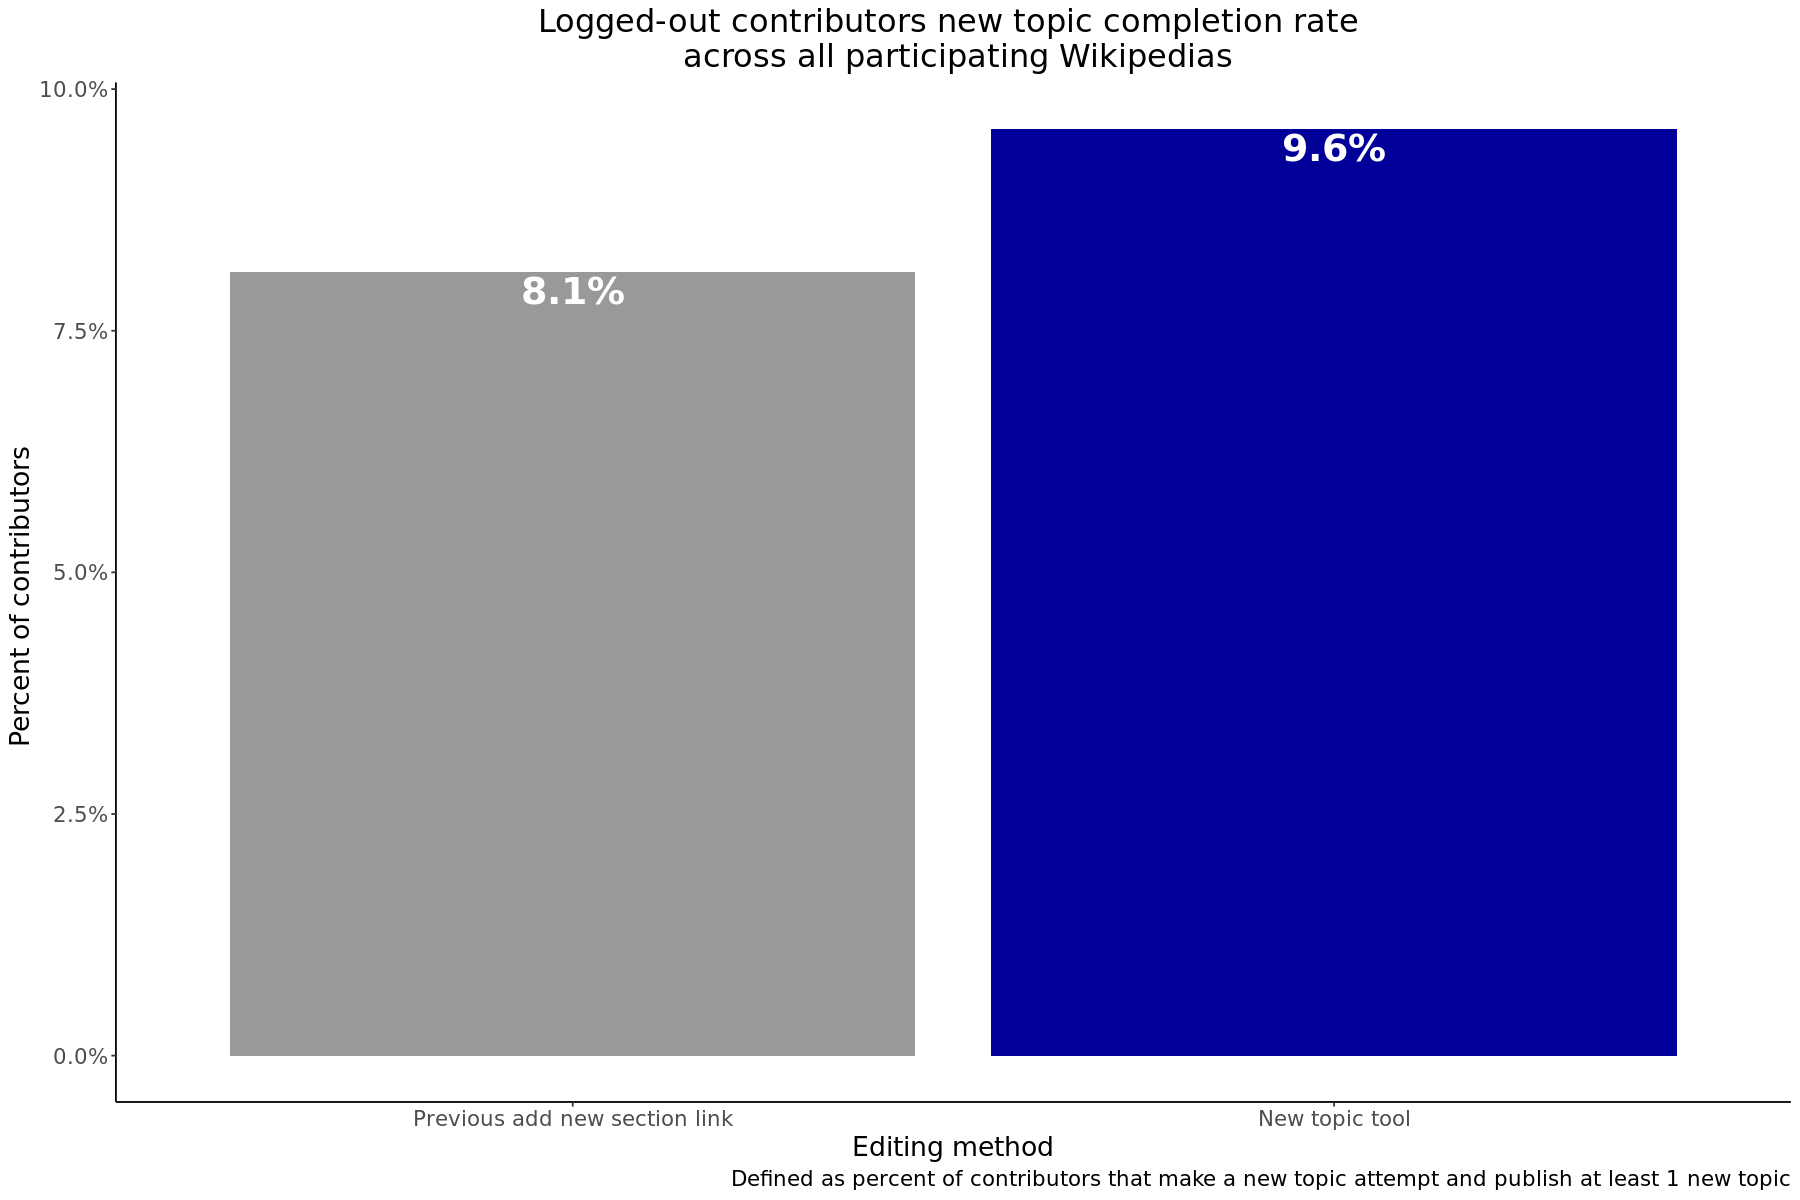

In [25]:
p <- new_topic_completes_all  %>%
    ggplot(aes(x= section_edit_type, y = n_users_completed / n_users, fill = section_edit_type)) +
    geom_col(position = 'dodge') +
    geom_text(aes(label = paste(completion_rate), fontface=2), vjust=1.2, size = 8, color = "white") +
    scale_y_continuous(labels = scales::percent) +
    scale_x_discrete(labels = c("Previous add new section link", "New topic tool")) +
    labs (y = "Percent of contributors ",
          x = "Editing method",
          title = "Logged-out contributors new topic completion rate \n across all participating Wikipedias",
         caption = "Defined as percent of contributors that make a new topic attempt and publish at least 1 new topic")  +
    scale_fill_manual(values= c("#999999", "#000099")) +
    theme(
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5),
        text = element_text(size=16),
        legend.position= "none",
        axis.line = element_line(colour = "black")) 
 

p
ggsave("Figures/new_topic_completes_all_anon.png", p, width = 16, height = 8, units = "in", dpi = 300)

Overall, 9.6% of all Junior Contributors that made a new topic attempt were able to successfully publish at least 1 new topic with the new topic tool, while 8.1% of all Junior Contributors successfully published a new topic using the previous new section link editing workflow. This represents a 1.5 percentage point; 18.5% observed increase in new topic completion rate. 

Note that this does not take into account the number of attempts it took for the user to publish or the duration of their editing sessions. If we look just at the percent of editing sessions succesfully completed, there was a 3.4 percentage point (8.4 → 11.8%); 40.5% observed increase in new topic completion rate for editing sessions completed using the new topic tool. 

## New topic completion rate by participating Wikipedia 

In [26]:
# Review edit completions by editing method and wiki
new_topic_completes_bywiki <- new_topic_completes %>%
    group_by(wiki, section_edit_type) %>%
    summarise(n_users = n_distinct(user_id), 
              n_users_completed = sum(n_completions >=1), #user completed at least 1 edit
              completion_rate = paste0(round(n_users_completed / n_users  *100, 1), "%"),
              .groups = 'drop'
  ) 

In [28]:
new_topic_completes_bywiki_anon_table <- new_topic_completes_bywiki   %>%
  gt() %>%
  tab_header(
    title = "Logged-out contributors new topic completion rate by participating Wikipedia"
  )  %>%
  cols_label(
    wiki = "Wikipedia",
    section_edit_type= "Editing method",
    n_users = "Number of users attempted",
    n_users_completed = "Number of users completed",
    completion_rate = "Completion rate"
  ) %>%
  tab_footnote(
    footnote = "Defined as percent of contributors that make a new topic attempt and publish at least 1 new topic",
    locations = cells_column_labels(
      columns = 'completion_rate'
    )
  ) %>%
  tab_footnote(
    footnote = "Sampling rate for Non-New Topic Tool events is 6.25%",
     locations = cells_column_labels(
      columns = 'section_edit_type'
    ) 
    ) %>%
  tab_footnote(
    footnote = "Sampling rate for New Topic Tool events is 100%",
    locations = cells_column_labels(
      columns = 'section_edit_type'
    )
  ) %>%
    gtsave(
    "new_topic_completes_bywiki_anon_table.html", inline_css = TRUE)

IRdisplay::display_html(data = new_topic_completes_bywiki_anon_table, file = "new_topic_completes_bywiki_anon_table.html")

new_topic_completes_bywiki_anon_table

1 Sampling rate for Non-New Topic Tool events is 6.25% 2 Sampling rate for New Topic Tool events is 100% 3 Defined as percent of contributors that make a new topic attempt and publish at least 1 new topic


NULL

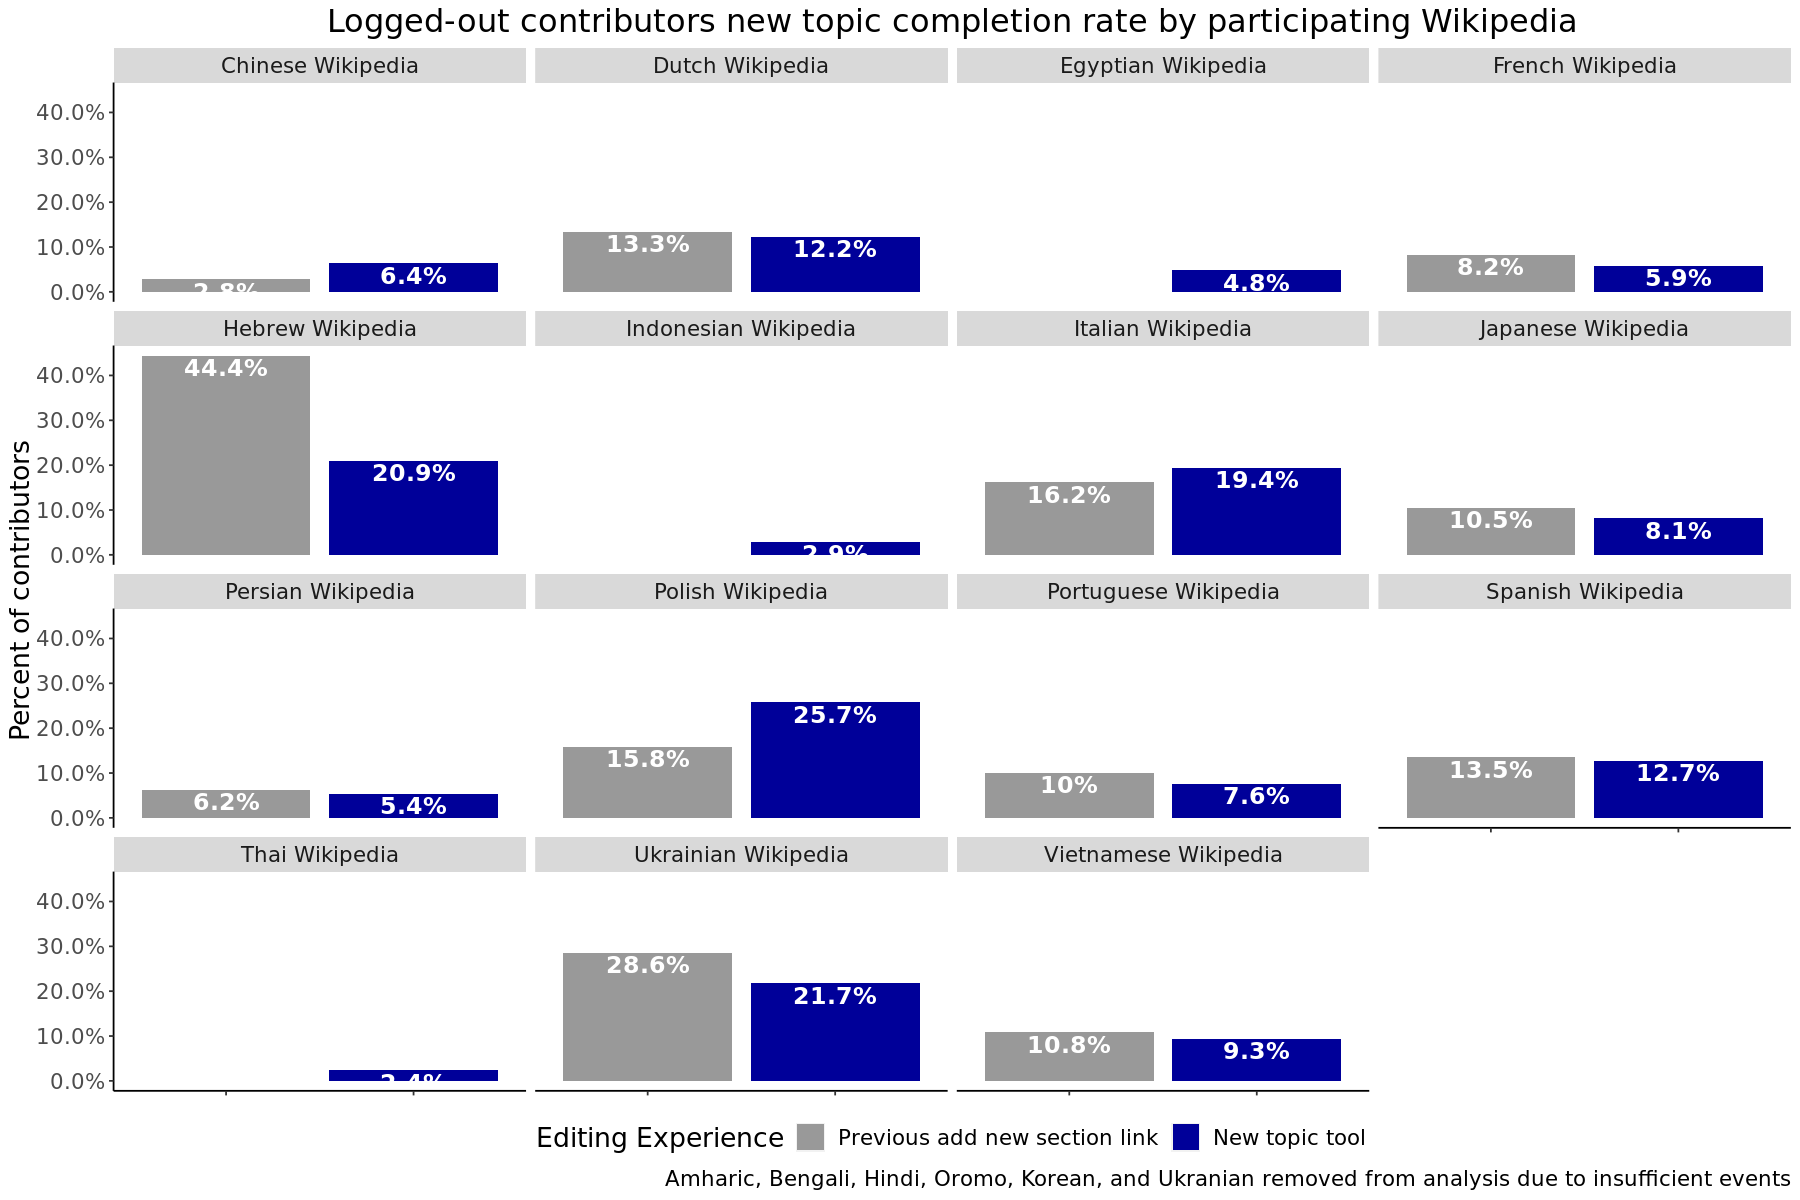

In [29]:
# Plot edit completion rates for each user on each wiki  

p <- new_topic_completes_bywiki  %>%
    filter(!(wiki %in% c('Amharic Wikipedia', 'Bengali Wikipedia', 'Hindi Wikipedia', 'Oromo Wikipedia',
                        'Korean Wikipedia', 'Ukranian Wikipedia'))) %>% # remove wikis where there are under 10 events total for editing method
    ggplot(aes(x= section_edit_type, y = n_users_completed / n_users, fill = section_edit_type)) +
    geom_col(position = 'dodge') +
    geom_text(aes(label = paste(completion_rate), fontface=2), vjust=1.2, size = 5, color = "white") +
    facet_wrap(~ wiki) +
    scale_y_continuous(labels = scales::percent) +
    labs (y = "Percent of contributors ",
          title = "Logged-out contributors new topic completion rate by participating Wikipedia",
        caption = "Amharic, Bengali, Hindi, Oromo, Korean, and Ukranian removed from analysis due to insufficient events")  +
    scale_fill_manual(values= c("#999999", "#000099"), name = "Editing Experience", labels = c("Previous add new section link", "New topic tool"))  +
    theme(
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5),
        text = element_text(size=16),
        legend.position="bottom",
        axis.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.line = element_line(colour = "black")) 

      
p
ggsave("Figures/new_topic_completes_bywiki_anon.png", p, width = 16, height = 8, units = "in", dpi = 300)

Trends vary on a per wikipedia basis.  

There were no signficiant differences between the two editing methods for any particular wiki with the exception of Hebrew Wikipedia, which saw a 20 percentage point decrease (44.4% → 20.9%; 50% decrease) in new topic completion rate for logged-out contributors using the new topic tool. 

Note: Some of this variation may be caused by the smaller sample sizes available for review on a per Wikipedia basis, especially for the previous add new sectionlinks events which were sampled at only 6.25%. Running the test for longer or increasing the sampling rate for non new topic tool events would help confirm any of these differences. 


## Modeling the impact of the new topic tool

We next explored different models to correctly infer the impact of the new topic tool on whether a new topic was completed or not and account for the random effects by the user and wiki. This allows us to confirm if the observed increase above is statistically significant (did not occur due to random chance).

New topic attempts completed on the same Wikipedia and by the users on that Wikipedia are related to each other. Therefore, we can more accurately infer the impact of the new topic tool by accounting for the effect of the user and wiki on the success probability of a Junior Contributor completing an edit.

We used a [Bayesian Hierarchical regression model](https://en.wikipedia.org/wiki/Bayesian_hierarchical_modeling) to model this structure. For this model, we reviewed whether each edit attempt was sucesfully completed or not. We identified the user and Wikipedia as random effects and whether the new topic tool was used as the fixed effect or predictor variable.

In [83]:
#redefine edit success as factor for use in the model
new_topic_completes_bysession$edit_success <-
  factor(
    new_topic_completesbysession$edit_success,
    levels = c("Not Complete", "Complete")
  )

In [84]:
priors <- c(
  set_prior(prior = "std_normal()", class = "b"),
  set_prior("cauchy(0, 5)", class = "sd")
)


In [ ]:
fit_jc <- brm(
  edit_success ~ section_edit_type + (1 | wiki/user_id),
  family = bernoulli(link = "logit"),
  data = new_topic_completesbysession,
  prior = priors,
  chains = 6, cores = 4
)

In [87]:
fit_jc_tbl <- fit_jc  %>%
  spread_draws(b_section_edit_typeNewtopictool, b_Intercept) %>%
  mutate(
    exp_b = exp(b_section_edit_typeNewtopictool),
    b4 = b_section_edit_typeNewtopictool/ 4,
    avg_lift =  plogis(b_Intercept + b_section_edit_typeNewtopictool) - plogis(b_Intercept)
  ) %>%
  pivot_longer(
    b_section_edit_typeNewtopictool:avg_lift,
    names_to = "param",
    values_to = "val"
  ) %>%
  group_by(param) %>%
  summarize(
    ps = c(0.025, 0.5, 0.975),
    qs = quantile(val, probs = ps),
    .groups = "drop"
  ) %>%
  mutate(
    quantity = ifelse(
      param %in% c("b_Intercept", "b_section_edit_typeNewtopictool"),
      "Parameter", "Function of parameter(s)"
    ),
    param = factor(
      param,
      c("b_Intercept", "b_section_edit_typeNewtopictool", "exp_b", "b4", "avg_lift"),
      c("(Intercept)", "Using new topic tool", "Multiplicative effect on odds", "Maximum Lift", "Average lift")
    ),
    ps = factor(ps, c(0.025, 0.5, 0.975), c("lower", "median", "upper")),
  ) %>%
  pivot_wider(names_from = "ps", values_from = "qs") %>%
  arrange(quantity, param)


In [88]:
fit_jc_tbl%>%
  gt(rowname_col = "param", groupname_col = "quantity") %>%
  row_group_order(c("Parameter", "Function of parameter(s)")) %>%
  fmt_number(vars(lower, median, upper), decimals = 3) %>%
  fmt_percent(columns = vars(median, lower, upper), rows = 2:3, decimals = 1) %>%
  cols_align("center", vars(median, lower, upper)) %>%
  cols_merge(vars(lower, upper), pattern = "({1}, {2})") %>%
  cols_move_to_end(vars(lower)) %>%
  cols_label(median = "Point Estimate", lower = "95% CI") %>%
  tab_style(cell_text(weight = "bold"), cells_row_groups()) %>%
  tab_footnote("CI: Credible Interval", cells_column_labels(vars(lower))) %>%
  tab_footnote(
    html("Average lift = Pr(Success|New Topic Tool) - Pr(Success|New Section Link Editing) = logit<sup>-1</sup>(&beta;<sub>0</sub> + &beta;<sub>1</sub>) - logit<sup>-1</sup>(&beta;<sub>0</sub>)"),
    cells_body(vars(median), 3)
  ) %>%
  tab_footnote(
    html("Maximum lift calculated using the divide-by-4-rule"),
    cells_body(vars(median), 2)
  ) %>%
  tab_header("Posterior summary of model parameters") %>%
      gtsave(
    "fit_jc_tbl_anon.html", inline_css = TRUE)


IRdisplay::display_html(file = "fit_jc_tbl_anon.html")

1 CI: Credible Interval 2 Maximum lift calculated using the divide-by-4-rule 3 Average lift = Pr(Success|New Topic Tool) - Pr(Success|New Section Link Editing) = logit-1(β0 + β1) - logit-1(β0)


Since the model parameters are on the log-odds scale, we needed to apply the following transformations to make sense of them. 
* We used the "divide-by-4" rule suggested by Gelman, Hill, and Vehtari 2021 [^Gelman] to approximate the maximum increase in the probability of success corresponding to which editing interface (reply tool or page editing) was used. Using the bayesian model, we can also directly calculate the average lift.
* Since the model parameters are on the log-odds scale, we need to take the exponentiation of the effect (exp(β~1~)) to determine the multiplicative effect on the odds of a Junior Contributor successfully publishing at least 1 comment.

[^Gelman]: Gelman, Andrew, Jennifer Hill, and Aki Vehtari. 2021. Regression and other stories. https://doi.org/10.1017/9781139161879.

While we observed an increase in the new topic completion rate, there is not sufficient evidence to definitively say that the new topic tool led to this increase - as indicated by a credible interval that crosses 1, since a multiplicative effect of 1 is no change either way.


# Guardrail Analyses

## New Topic Revert Rate 

We also wanted to ensure that enabling the new topic tool did not result in an increase in the number of disruptive edits being made to talk pages. 

To evaluate any disruption caused by the new topic tool, we determined the percent of new topic published to talk pages that were reverted within 48 hours and the percent of contributors blocked after making a comment to a talk page.  

### Methodology

For this analysis, we reviewed data recorded in [mediawiki_history](https://wikitech.wikimedia.org/wiki/Analytics/Data_Lake/Edits/MediaWiki_history) to identify the percent comments posted with the new topic tool (identified by the revision tag: `discussiontools-newtopic`) on talk pages that are reverted within 48 hours [^revert].  We joined this data with AB test data logged in editattemptstep and talk_page_edit to isolate data to the attempts included in the AB test and try to exclude any non new topic edits. 

[^revert]: 48 hours is a common cutoff, as research suggests that, at least for the English Wikipedia, nearly all reverts take place within 48 hours. Source: Research: Revert. Mediawiki. https://meta.wikimedia.org/wiki/Research:Revert.

We compared the revert rate for new topics published using the new topic tool to the revert rate for new topics made using the existing section link editing during the same timeframe. 


In [30]:
new_topic_reverts_anon <-
  read.csv(
    file = 'Data/new_topic_reverts_anon.csv',
    header = TRUE,
    sep = ",",
    stringsAsFactors = FALSE
  ) # loads all revert data

In [31]:
#clarfiy levels and lables for factor variables
new_topic_reverts_anon$section_edit_type <-
  factor(
    new_topic_reverts_anon$section_edit_type,
    levels = c("non-new-topic-tool", "new-topic-tool"),
    labels = c("Previous add new section link", "New topic tool")
  )

#clarfiy wiki names
new_topic_reverts_anon <- new_topic_reverts_anon %>%
 mutate(
    wiki = case_when(
      #clarfiy participating project names
      wiki == 'amwiki' ~ "Amharic Wikipedia",
      wiki == 'bnwiki' ~ "Bengali Wikipedia",
      wiki == 'zhwiki' ~ "Chinese Wikipedia",
      wiki == 'nlwiki' ~ 'Dutch Wikipedia',
      wiki == 'arzwiki' ~ 'Egyptian Wikipedia',
      wiki == 'frwiki' ~ 'French Wikipedia',
      wiki == 'hewiki' ~ 'Hebrew Wikipedia',
      wiki == 'hiwiki' ~ 'Hindi Wikipedia',
      wiki == 'idwiki' ~ 'Indonesian Wikipedia',
      wiki == 'itwiki' ~ 'Italian Wikipedia',  
      wiki == 'jawiki' ~ 'Japanese Wikipedia',   
      wiki == 'kowiki' ~ 'Korean Wikipedia',
      wiki == 'omwiki' ~ 'Oromo Wikipedia', 
      wiki == 'fawiki' ~ 'Persian Wikipedia',  
      wiki == 'plwiki' ~ 'Polish Wikipedia',   
      wiki == 'ptwiki' ~ 'Portuguese Wikipedia',
      wiki == 'eswiki' ~ 'Spanish Wikipedia',
      wiki == 'thwiki' ~ 'Thai Wikipedia',  
      wiki == 'ukwiki' ~ 'Ukrainian Wikipedia',
      wiki == 'viwiki' ~ 'Vietnamese Wikipedia',    
    )
  ) 

### Revert rate overall across all participating Wikipedias

In [32]:
# aggregrate based on editing experience type
new_topic_reverts_all <- new_topic_reverts_anon %>%
    group_by(section_edit_type) %>%
    summarise(total_reverts = sum(num_reverts),
              total_comments = sum(num_comments),
              revert_rate =paste(round(total_reverts/total_comments * 100, 2), '%'), .groups = 'drop') 

In [33]:
new_topic_reverts_anon_all_table <- new_topic_reverts_all %>%
  gt()  %>%
  tab_header(
    title = "Logged-out contributors new topic revert rate across all participating Wikipedias",
    subtitle = "Across all participating Wikipedias"
  )  %>%
  cols_label(
    section_edit_type = "Editing method",
    total_reverts = "Number of new topics reverted",
    total_comments = "Number of new topics published",
    revert_rate = "Revert rate"
  ) %>%

  tab_footnote(
    footnote = "Defined as percent of new topics reverted within 48 hours.",
    locations = cells_column_labels(
      columns = 'revert_rate'
    )
  )  %>%
  tab_footnote(
    footnote = "Sampling rate is 100% for new topic tool events and 6.25% for non-new topic tool events",
    locations = cells_column_labels(
      columns = 'section_edit_type'
    )
  ) %>%
    gtsave(
    "new_topic_reverts_anon_all_table.html", inline_css = TRUE)

IRdisplay::display_html(file = "new_topic_reverts_anon_all_table.html")


1 Sampling rate is 100% for new topic tool events and 6.25% for non-new topic tool events 2 Defined as percent of new topics reverted within 48 hours.


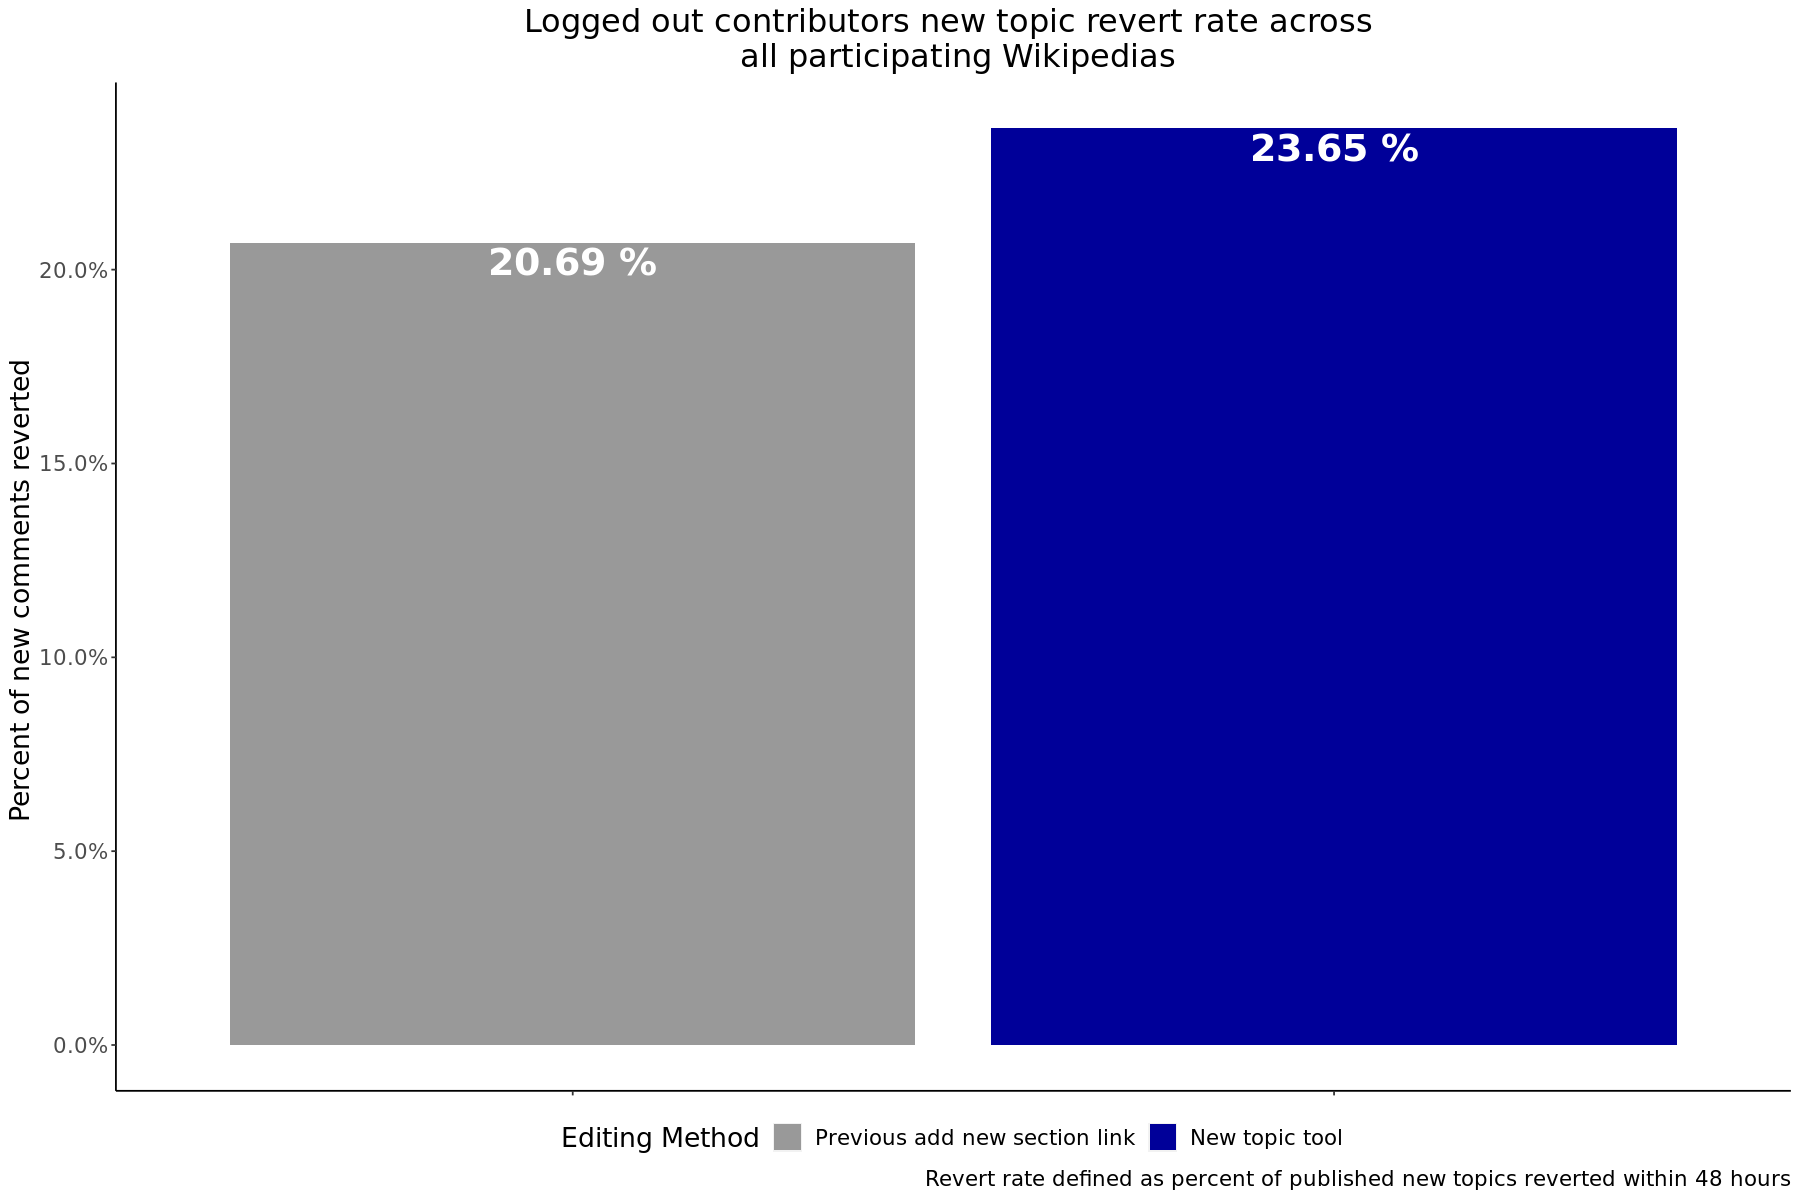

In [35]:
# Plot revert rates

p <- new_topic_reverts_all %>%
    ggplot(aes(x= section_edit_type, y = total_reverts/ total_comments, fill = section_edit_type)) +
    geom_col(position = 'dodge') +
    geom_text(aes(label = paste(revert_rate), fontface=2), vjust=1.2, size = 8, color = "white") +
    scale_y_continuous(labels = scales::percent) +
    scale_x_discrete(labels = c("Previous add new section link", "New topic tool")) +
    labs (y = "Percent of new comments reverted ",
          title = "Logged out contributors new topic revert rate across \n all participating Wikipedias",
         caption = "Revert rate defined as percent of published new topics reverted within 48 hours")  +
    scale_fill_manual(values= c("#999999", "#000099"), name = "Editing Method", labels = c("Previous add new section link", "New topic tool"))  +
    theme(
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5),
        text = element_text(size=16),
        legend.position="bottom",
        axis.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.line = element_line(colour = "black")) 

p
ggsave("Figures/new_topic_reverts_anon_all .png", p, width = 16, height = 8, units = "in", dpi = 300)

Overall, across all participating Wikipedias, we observed a slight 3 percentage point (29.7% → 23.7%; 14.3% increase) in the revert rate for new topic tool edits made by Junior Contributors compared to edits made using the previous add section link.  

### Revert rate by participating Wikipedia

In [36]:
# aggregrate data by wiki and editing interface
new_topic_reverts_bywiki <- new_topic_reverts_anon %>%
    group_by(wiki, section_edit_type) %>%
    summarise(total_reverts = sum(num_reverts),
              total_comments = sum(num_comments),
              revert_rate =paste(round(total_reverts/total_comments * 100, 2), '%'), .groups = 'drop') 

In [38]:
new_topic_reverts_anon_bywiki_table <- new_topic_reverts_bywiki   %>%
  gt()  %>%
  tab_header(
    title = "Logged-out Contributors new topic revert rate by participating Wikipedia"
  )  %>%
  cols_label(
    wiki = "Wikipedia",
    section_edit_type = "Editing method",
    total_reverts = "Number of new topics reverted",
    total_comments = "Number of new topics published",
    revert_rate = "Revert rate"
  ) %>%
  tab_footnote(
    footnote = "Defined as percent of new topic reverted within 48 hours.",
    locations = cells_column_labels(
      columns = 'revert_rate'
    )
  ) %>%
  tab_footnote(
    footnote = "Sampling rate is 100% for new topic tool events and 6.25% for non-new topic tool events",
    locations = cells_column_labels(
      columns = 'section_edit_type'
    )
  ) %>%
    gtsave(
    "new_topic_reverts_anon_bywiki_table.html", inline_css = TRUE)

IRdisplay::display_html(file = "new_topic_reverts_anon_bywiki_table.html")

1 Sampling rate is 100% for new topic tool events and 6.25% for non-new topic tool events 2 Defined as percent of new topic reverted within 48 hours.


Some per participating Wikipedia trend highlights :

* Revert rates vary on a per wiki basis. Some of this variation is due to the signficant difference in number of events logged for each new topic edit type. Since new topic tool events were sampled at 100% and non-new topic tool events were sampled at 6.25%, some of the smaller wikis had very few number of non new topic tool events logged to obtain a representative sample. 
* Running the AB test for longer or increasing the sampling rate for non topic tool events to 100% would help identify a revert rate representative of the sample.

# Curiosities

We also explored if the new topic tool resulted in a greater number of Junior Contributors to start participating productively on talk pages and if it caused a greater percentage of Junior Contributors to continue participating productively on talk pages.

Note: We did not look at retention for logged-out new topic users because unlike the logged-in users who have a persistent bucket that's applied to their account, the logged out bucketing applies entirely to the current browser that is being used by the logged-out user. As a result, this is metric is susceptible to variation in the user's browser selection and not reliable.

## Number of Logged-Out Contributors

This metric was defined as the number of distinct logged-out Contributors (based on the `anonymous_user_token` field in EditAttemptStep) who make at least one new topic edit to a page in a talk namespace that is not reverted within 48 hours. Since different sampling rates were applied to each editor type, we removed any events that were oversampled (sampling rate increased to 100%) to allow us to directly compare the numbers between the two groups.

Note: The logged out bucketing applies entirely to the current browser that is being used by the logged-out contributor. If the logged-out user switched browsers, they may be rebucketed or counted twice. FIXME: Need to confirm.


In [42]:
num_anon_editors <- new_topic_attempts %>%
          filter(is_oversample == 'false' ) %>% #remove oversampled events
    group_by(experiment_group, section_edit_type)  %>%
    summarise(total_users_attempt = n_distinct(user_id),
              total_users_complete = n_distinct(user_id[edit_success == 'Complete']), .groups = 'drop') 

In [40]:
num_anon_editors_table <- num_anon_editors %>%
  gt() %>%
  tab_header(
    title = "Number of Logged Out Contributors that made a new topic attempt during the AB test by test group and section edit type"
  )  %>%
  cols_label(
    experiment_group = "Test group",
    section_edit_type = "Editing experience",
    total_users_attempt = "Number of users that attempted a new topic",
    total_users_complete = "Number of users that published a new topic"
  ) %>%
  tab_row_group(
    rows = experiment_group == 'control'
  ) %>%
tab_row_group(
    rows = experiment_group == 'test'
  ) %>%
  tab_footnote(
    footnote = "Based on a sampling rate of 6.25% for all events. Any oversampled events were removed so data for the two editor types could be directly compared",
    locations = cells_title(
      )
  ) %>%
  tab_footnote(
    footnote = "Users were not shown the new topic tool by default",
    locations = cells_row_groups(groups = "control")
  ) %>%
  tab_footnote(
    footnote = "Users were shown the new topic tool by default",
    locations = cells_row_groups(groups = "test")
  ) %>%
    gtsave(
    "num_anon_editors_table.html", inline_css = TRUE)

IRdisplay::display_html(file = "num_anon_editors_table.html")

Warning message in if ((loc$groups %>% rlang::eval_tidy()) == "title") {:
“the condition has length > 1 and only the first element will be used”


1 Based on a sampling rate of 6.25% for all events. Any oversampled events were removed so data for the two editor types could be directly compared 2 Users were not shown the new topic tool by default 3 Users were shown the new topic tool by default


A few explanations regarding the numbers above:
* A logged out Contirbutor does not have the option of explicitly turning the tool on or off in their preferences. As a result, access to the new topic tool was limited to logged-out users bucketed into the test group.
* There are still some previous ass new section link attempts that appear in the test group. These might be mislabeled create new section edits or another way to create a new section outside of the add new section link and full page editing. Further investigation is needed to confirm source. 

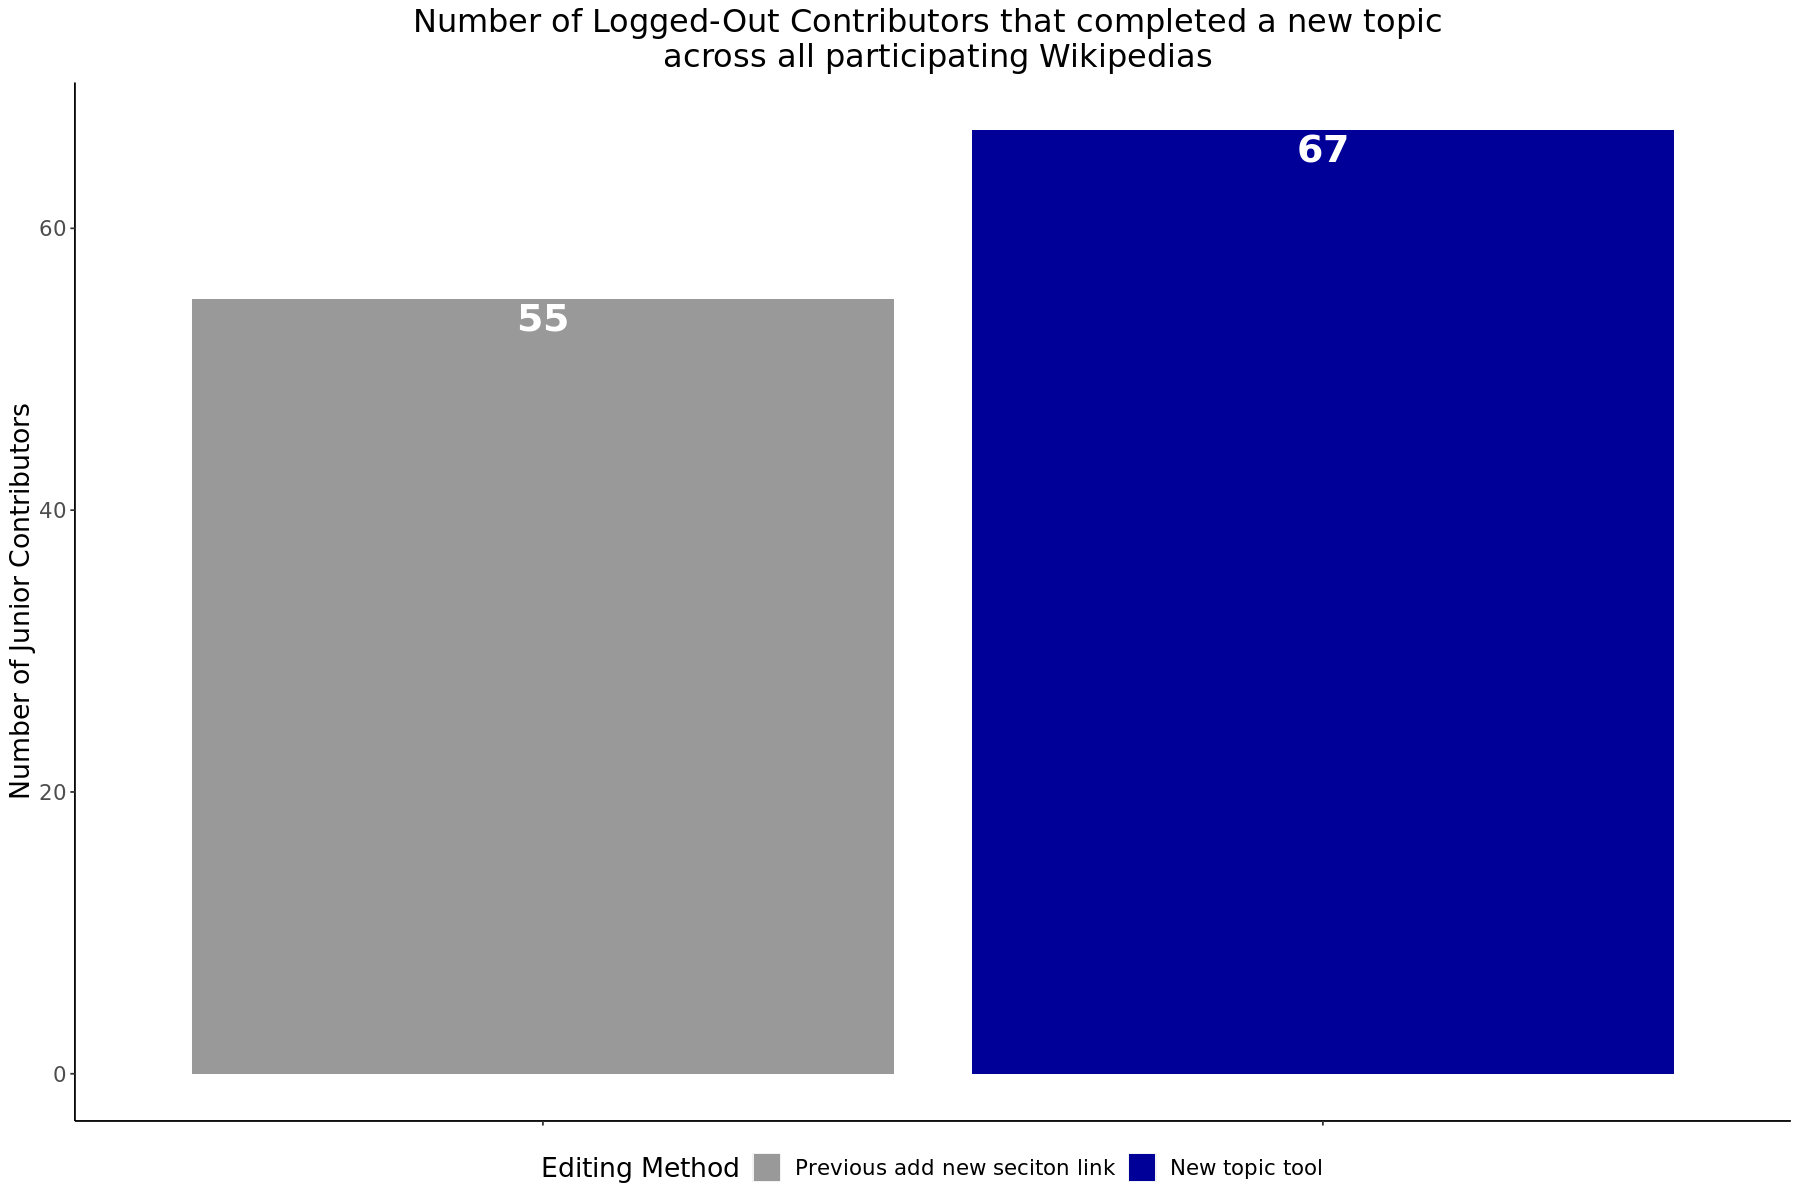

In [43]:
p <-num_anon_editors %>%
  group_by(section_edit_type) %>%
  summarise(total_user_complete = sum(total_users_complete), .groups = 'drop') %>%
  ggplot(aes(x= section_edit_type, y = total_user_complete, fill = section_edit_type)) +
  geom_col(position = 'dodge') +
  geom_text(aes(label = paste(total_user_complete),fontface=2), vjust=1.2, size = 8, color = "white") +
  labs (y = "Number of Junior Contributors",
        x = "Experiment group",
        title = "Number of Logged-Out Contributors that completed a new topic \n across all participating Wikipedias")  +
  scale_fill_manual(values= c("#999999", "#000099"), name = "Editing Method", labels = c("Previous add new seciton link", "New topic tool"))  +
    theme(
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5),
        text = element_text(size=16),
        legend.position="bottom",
        axis.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.line = element_line(colour = "black")) 

p

ggsave("Figures/num_anon_editors_bygroup.png", p, width = 16, height = 8, units = "in", dpi = 300)

There were 12 more distinct anonymous users that sucessfully completed an edit with the new topic tool compared the the previous add new section link.